In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/Datasets/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: img_align_celeba/img_align_celeba/197605.jpg  
  inflating: img_align_celeba/img_align_celeba/197606.jpg  
  inflating: img_align_celeba/img_align_celeba/197607.jpg  
  inflating: img_align_celeba/img_align_celeba/197608.jpg  
  inflating: img_align_celeba/img_align_celeba/197609.jpg  
  inflating: img_align_celeba/img_align_celeba/197610.jpg  
  inflating: img_align_celeba/img_align_celeba/197611.jpg  
  inflating: img_align_celeba/img_align_celeba/197612.jpg  
  inflating: img_align_celeba/img_align_celeba/197613.jpg  
  inflating: img_align_celeba/img_align_celeba/197614.jpg  
  inflating: img_align_celeba/img_align_celeba/197615.jpg  
  inflating: img_align_celeba/img_align_celeba/197616.jpg  
  inflating: img_align_celeba/img_align_celeba/197617.jpg  
  inflating: img_align_celeba/img_align_celeba/197618.jpg  
  inflating: img_align_celeba/img_align_celeba/197619.jpg  
  inflating: img_align_celeba/img_align_celeba/19

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [5]:
images=[]

In [6]:
base_dir="/content/img_align_celeba/img_align_celeba"
files = os.listdir(base_dir)
for file in files:
  images.append(os.path.join(base_dir,file))



In [9]:
images=np.array(images)

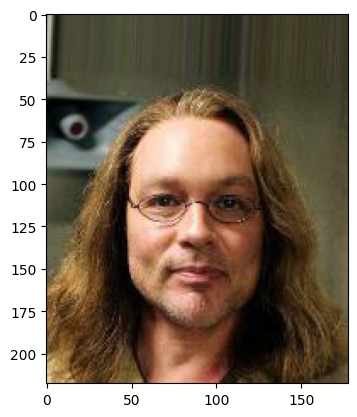

In [10]:
image = plt.imread(images[9])
plt.imshow(image)

In [8]:
import numpy as np
import tensorflow as tf
from PIL import Image
from keras.models import Sequential
from keras. optimizers import Adam
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model


In [11]:
def define_discriminator(in_shape=(64,64,3)):
  model=Sequential()
  #normal
  model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
  model.add(LeakyReLU(alpha=0.2))
  #downsample
  model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  #downsample
  model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  #downsample
  model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Flatten())
  model.add(Dropout(0.3))
  model.add(Dense(1,activation='sigmoid'))

  opt=Adam(learning_rate=0.0002,beta_1=0.5)
  model.compile(optimizer=opt,loss=tf.keras.losses.BinaryCrossentropy())
  return model



In [12]:
def generate_real_samples(image_paths, n_samples):
    desired_width=64
    desired_height=64
    loaded_images = []
    np.random.shuffle(image_paths)
    sample_paths = image_paths[:n_samples]

    for image_path in sample_paths:
        # Open the image using PIL
        image = Image.open(image_path)
        image = image.resize((desired_width, desired_height))
        image = np.array(image)
        image = image.astype(np.float32) / 255.0  # Normalize pixel values to [0, 1]
        image = (image - 0.5) * 2  # Scale pixel values to [-1, 1]
        # Append the loaded image to the list
        loaded_images.append(image)

    y = np.ones((n_samples, 1))
    loaded_images = np.array(loaded_images)
    return loaded_images, y

In [13]:
img,index=generate_real_samples(images,110)
print(img.shape)

(110, 64, 64, 3)


In [ ]:
def generate_fake_sample(n_sample):
  x=np.random.rand(128*128*3*n_sample)
  x=-1+x*2
  x=x.reshape(n_sample,128,128,3)
  x=np.array(x)
  y = np.zeros((n_sample, 1))
  return x,y


In [ ]:
img,index=generate_fake_sample(1)
print(img.shape)

(1, 128, 128, 3)


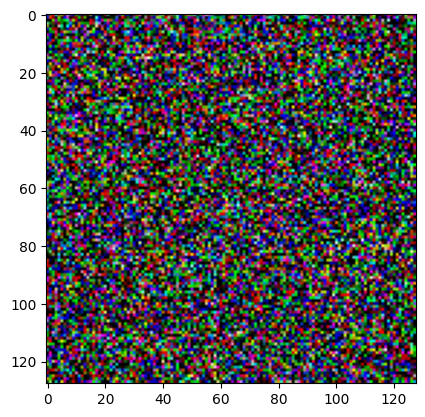

In [ ]:
plt.imshow(img[0])

In [14]:

# define the standalone generator model
def define_generator(latent_dim):
  model=Sequential()
  n_nodes=256*4*4
  model.add(Dense(n_nodes, input_dim=latent_dim))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((4, 4, 256)))
  # upsample to 8x8
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding="same"))
  model.add(LeakyReLU(alpha=0.2))
  #upsample to 16x16
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding="same"))
  model.add(LeakyReLU(alpha=0.2))
  # upsample to 32x32
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding="same"))
  model.add(LeakyReLU(alpha=0.2))
  # upsample to 64x64
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding="same"))
  model.add(LeakyReLU(alpha=0.2))
  # output layer
  model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
  return model

In [15]:
latent_dim=100
model=define_generator(latent_dim)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4096)              413696    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 4096)              0         
                                                                 
 reshape (Reshape)           (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 8, 8, 128)        524416    
 nspose)                                                         
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 16, 16, 128)      262272    
 ranspose)                                              

In [16]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
 # generate points in the latent space
 x_input = np.random.randn(latent_dim * n_samples)
 # reshape into a batch of inputs for the network
 x_input = x_input.reshape((n_samples, latent_dim))
 return x_input

In [17]:
n_dim = 100
# number of samples to generate
n_samples = 128
# generate samples
samples = generate_latent_points(n_dim, n_samples)
# summarize
print(samples.shape, samples.mean(), samples.std())

(128, 100) 0.009839337656243997 0.9980878523527899


In [18]:
def generate_fake_samples(g_model,latent_dim,n_sample):
   sample=generate_latent_points(latent_dim, n_sample)
   x=g_model.predict(sample)
   y=np.zeros((n_sample,1))
   return x,y

In [ ]:
# size of the latent space
latent_dim=200
# define the discriminator model
model = define_generator(latent_dim)
# generate samples
n_samples=49

x, _ = generate_fake_samples(model, latent_dim, n_samples)
#  scale pixel values from [-1,1] to [0,1]
X = (x + 1) / 2.0
# plot the generated samples
for i in range(n_samples):
  # define subplot
  plt.subplot(7, 7, i+1)
  # turn off axis labels
  plt.axis('off')
  # plot single image
  plt.imshow(x[i])
  # show the figure
  plt.show()


In [19]:
def define_gan(g_model,d_model):
  d_model.trainable=False
  model=Sequential()
  model.add(g_model)
  model.add(d_model)
  opt=Adam(learning_rate=0.0002,beta_1=0.5)
  model.compile(optimizer=opt,loss=tf.keras.losses.BinaryCrossentropy())
  return model



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 64, 64, 3)         1728387   
                                                                 
 sequential_1 (Sequential)   (None, 1)                 379009    
                                                                 
Total params: 2,107,396
Trainable params: 1,728,387
Non-trainable params: 379,009
_________________________________________________________________


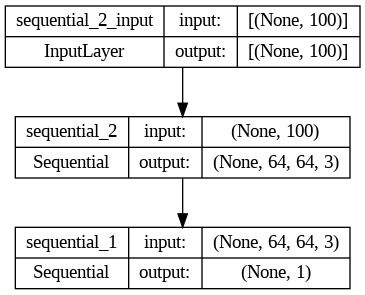

In [20]:

# size of the latent space
latent_dim=100
# create the discriminator
d_model = define_discriminator()
#create the generator
g_model=define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
#summarize gan model
gan_model.summary()
# • plot gan model
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

In [21]:

# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=200, n_batch=200):
  bat_per_epo=int(dataset.shape[0] / n_batch)
  half_batch=int(n_batch / 2)
  # manually enumerate epochs
  for i in range(n_epochs):
  # enumerate batches over the training set
    for j in range(bat_per_epo):
    #get randomly selected 'real' samples
      X_real, y_real=generate_real_samples(dataset, half_batch)
      # update discriminator model weights
      d_loss1=d_model.train_on_batch(X_real, y_real)
      # generate 'fake' examples
      X_fake, y_fake=generate_fake_samples(g_model, latent_dim, half_batch) #update discriminator model weights
      d_loss2= d_model.train_on_batch(X_fake, y_fake)
      #prepare points in latent space as input for the generator
      X_gan = generate_latent_points(latent_dim, n_batch)
      # create inverted labels for the fake samples
      y_gan =np.ones((n_batch, 1))
      # update the generator via the discriminator's error
      gloss= gan_model.train_on_batch(X_gan, y_gan)
      # summarize loss on this batch
      print('%d,%d/%d, d1=%.3f, d2=%.3f g=%.3f' %
      (i+1, j+1, bat_per_epo, d_loss1, d_loss2, gloss))
      #evaluate the model performance, sometimes
    if (i+1)%10 == 0:
      summarize_performance(i, g_model, d_model, dataset, latent_dim)


In [22]:
# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=150):
    # prepare real samples
    X_real, y_real = generate_real_samples(dataset, n_samples)
    # evaluate discriminator on real examples
    acc_real = d_model.evaluate(X_real, y_real, verbose=0)
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
    # evaluate discriminator on fake examples
    acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
    # summarize discriminator performance
    print('> Accuracy real: %.2f%%, fake: %.2f%%' % (acc_real * 100, acc_fake * 100))
    # save plot
    save_plot(x_fake, epoch)
    # save the generator model tile file
    filename = 'generator_model_${0}.h5'.format(epoch+1)
    g_model.save(filename)


In [23]:
# create and save a plot of generated images
def save_plot(examples, epoch, n=7):
  # scale from [-1,1] to [0,1]
  examples = (examples + 1)/2.0 #plot images
  for i in range(n*n):
    # define subplot
    plt.subplot(n, n, 1 + i)
    # turn off axis
    plt.axis('off')
    # plot raw pixel data
    plt.imshow(examples[1])
    # save plot to file
    filename='generated_plot_${0}.png'.format(epoch+1)
    plt.savefig(filename)
    plt.close()

In [43]:
summarize_performance(10, g_model, d_model, images, 100, 150)

5/5 [==============================] - 6s 1s/step
> Accuracy real: 69.93%, fake: 69.32%


In [1]:
train(g_model, d_model, gan_model, images, latent_dim)

NameError: ignored